In [11]:
import numpy as np
import pandas as pd
from warnings import warn
import qgrid as qg

import matplotlib.pyplot as plt

In [12]:
data = pd.read_excel("q011.xlsx")

In [13]:
data.head()

,Код склада,Название склада,Дата,Код гр.,Название гр.,Код товара,1 наименование,2 наименование,кол-во,Сумма в пр.ценах,Сумма в ср. зак,Сумма в баз. Ценах,Стоимость одной штуки
0,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23332850,Паста зубная Splat prof ультракомплекс 1,Паста зубная Splat prof ультракомплекс 100мл,1,154.0,109.51,159.0,159.0
1,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23595712,Щетка зубная Splat COMPLETE Soft для Ком,Щетка зубная Splat COMPLETE Soft для Комплексн...,1,174.0,116.21,179.0,179.0
2,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23668331,Паста зубная BLEND-A-MED ProExpert Все в,Паста зубная BLEND-A-MED ProExpert Все в одном...,1,169.0,114.72,169.0,169.0
3,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23782174,Прокладки гигиенические NATURELLA Camomi,Прокладки гигиенические NATURELLA Camomile Nor...,1,180.0,134.91,189.0,189.0
4,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23830790,Средство для мытья посуды 'Help' Бальзам,Средство для мытья посуды 'Help' Бальзам Лимон...,1,74.0,46.67,75.0,75.0


In [14]:
print('Кол-во уникальных товаров: ', data['Код товара'].unique().shape)
print('Объем данных: ', data.shape)

Кол-во уникальных товаров:  (1870,)
Объем данных:  (853937, 13)


In [15]:
codes = data['Код товара'].unique()

In [22]:
data_code_test = data.loc[data['Код товара'] == codes[28]][['Дата', '1 наименование', 'кол-во', 'Стоимость одной штуки']]
data_code_test

,Дата,1 наименование,кол-во,Стоимость одной штуки
28,2017-08-11,Хозяйственное мыло классическое 72%,3,32.0
190,2017-08-15,Хозяйственное мыло классическое 72%,4,32.0
224,2017-08-16,Хозяйственное мыло классическое 72%,4,32.0
488,2017-08-23,Хозяйственное мыло классическое 72%,1,32.0
530,2017-08-25,Хозяйственное мыло классическое 72%,1,32.0
...,...,...,...,...
850418,2020-07-02,Хозяйственное мыло классическое 72%,1,39.0
850628,2020-07-04,Хозяйственное мыло классическое 72%,1,39.0
853478,2020-08-04,Хозяйственное мыло классическое 72%,2,39.0
853684,2020-08-07,Хозяйственное мыло классическое 72%,1,39.0


In [65]:
data_code_test = qg.show_grid(data_code_test)

In [66]:
data_code_test

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [72]:
data_code_test.get_changed_df()

,Дата,1 наименование,кол-во,Стоимость одной штуки
28,2017-08-11,Хозяйственное мыло классическое 72%,3,32.0
190,2017-08-15,Хозяйственное мыло классическое 72%,4,32.0
224,2017-08-16,Хозяйственное мыло классическое 72%,4,32.0
488,2017-08-23,Хозяйственное мыло классическое 72%,1,32.0
530,2017-08-25,Хозяйственное мыло классическое 72%,1,32.0
...,...,...,...,...
849886,2020-06-26,Хозяйственное мыло классическое 72%,1,NaN
849976,2020-06-27,Хозяйственное мыло классическое 72%,1,NaN
850333,2020-07-01,Хозяйственное мыло классическое 72%,1,39.0
850418,2020-07-02,Хозяйственное мыло классическое 72%,1,39.0


In [81]:
data_code_test = pd.DataFrame(data = data_code_test)

ValueError: DataFrame constructor not properly called!

In [82]:
data_code_test.to_excel('train.xlsx')

AttributeError: 'QgridWidget' object has no attribute 'to_excel'

# Здесь начинается Пророк

In [68]:
from fbprophet import Prophet
from datetime import datetime
import time

In [69]:
dates=data_code_test[['Дата']].values

TypeError: 'QgridWidget' object is not subscriptable

In [50]:
dates=data_code_test[['Дата']].values.reshape(1,-1)[0]
print(dates)

['2017-08-11T00:00:00.000000000' '2017-08-15T00:00:00.000000000'
 '2017-08-16T00:00:00.000000000' ... '2020-08-04T00:00:00.000000000'
 '2020-08-07T00:00:00.000000000' '2020-08-09T00:00:00.000000000']


In [51]:
ds = pd.to_datetime(dates)
ds

DatetimeIndex(['2017-08-11', '2017-08-15', '2017-08-16', '2017-08-23',
               '2017-08-25', '2017-08-31', '2017-09-02', '2017-09-09',
               '2017-09-16', '2017-09-21',
               ...
               '2020-06-20', '2020-06-24', '2020-06-26', '2020-06-27',
               '2020-07-01', '2020-07-02', '2020-07-04', '2020-08-04',
               '2020-08-07', '2020-08-09'],
              dtype='datetime64[ns]', length=5608, freq=None)

In [52]:
y=data_code_test[['кол-во']].values.reshape(1,-1)[0]
print(y)

[3 4 4 ... 2 1 1]


In [53]:
print(y.shape, ds.shape)

(5608,) (5608,)


In [54]:
predictions = 42

In [64]:
forecast_prophet = pd.DataFrame({'ds': ds, 'y': y})
forecast_prophet.tail(42)

,ds,y
5566,2019-07-02,4
5567,2019-07-04,1
5568,2019-07-05,1
5569,2019-07-06,2
5570,2019-07-08,2
5571,2019-07-21,2
5572,2019-08-01,1
5573,2019-08-02,2
5574,2019-08-07,1
5575,2019-09-06,2


In [63]:
forecast_prophet = forecast_prophet[:-predictions]
forecast_prophet

,ds,y
0,2017-08-11,3
1,2017-08-15,4
2,2017-08-16,4
3,2017-08-23,1
4,2017-08-25,1
...,...,...
5561,2019-06-25,44
5562,2019-06-28,7
5563,2019-06-29,9
5564,2019-06-30,4


In [17]:
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='RU')
model.fit(forecast_prophet)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [18]:
model.train_holiday_names

0                    New Year's Day
1            Orthodox Christmas Day
2                     Christmas Day
3    Defender of the Fatherland Day
4         International Women's Day
5                 National Flag Day
6             Spring and Labour Day
7                       Victory Day
8                        Russia Day
9                         Unity Day
dtype: object

In [19]:
future = model.make_future_dataframe(periods=24, freq='W')
future.head()

,ds
0,2017-08-10
1,2017-08-10
2,2017-08-10
3,2017-08-10
4,2017-08-10


In [20]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5627,2020-12-27,1.632907,-1.289730,4.589275
5628,2021-01-03,1.535747,-1.297416,4.573500
5629,2021-01-10,1.452003,-1.397209,4.335912
5630,2021-01-17,1.478755,-1.395384,4.421804
5631,2021-01-24,1.568664,-1.503177,4.513540


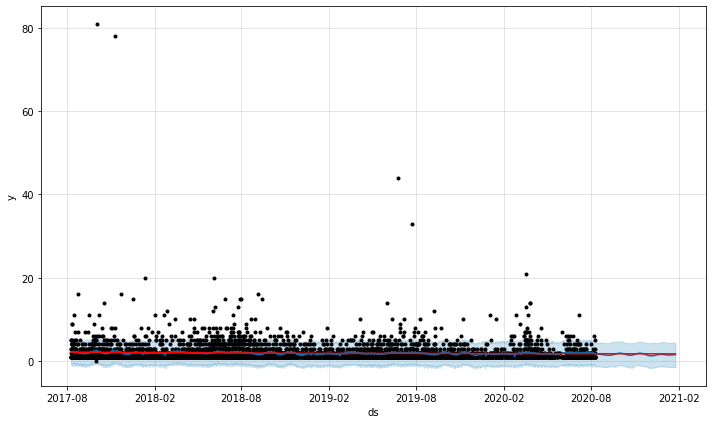

In [21]:
from fbprophet.plot import add_changepoints_to_plot
fig3 = model.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), model, forecast)


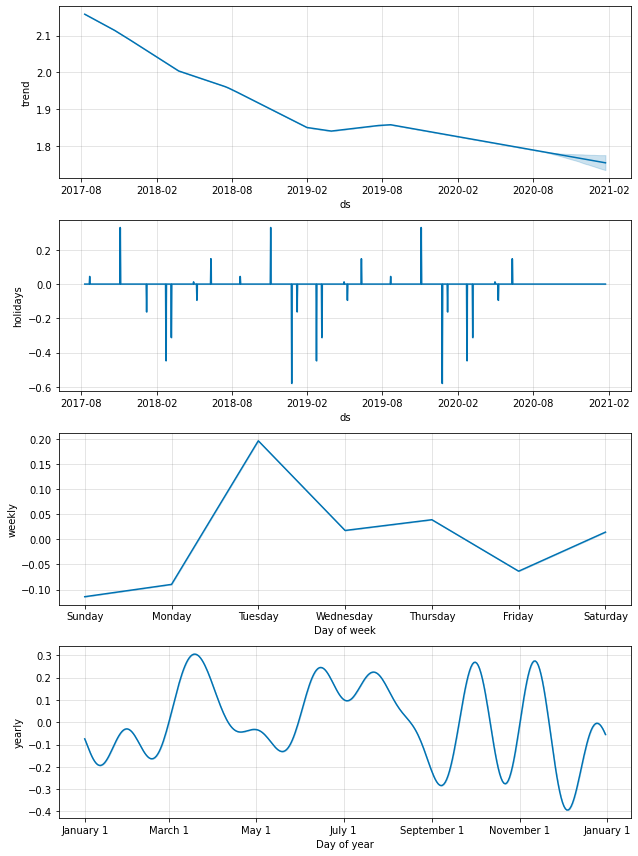

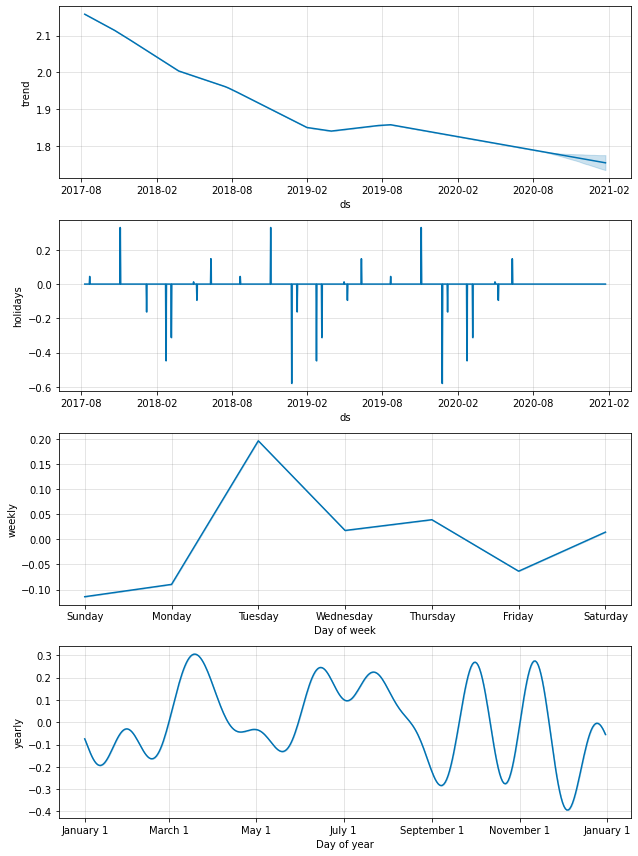

In [22]:
model.plot_components(forecast)